In [1]:
!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

In [24]:
def load_data():
    try:
        customers_df = pd.read_csv('Downloads/Customers.csv')
        products_df = pd.read_csv('Downloads/Products.csv')
        transactions_df = pd.read_csv('Downloads/Transactions.csv')
        customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
        transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
        return customers_df, products_df, transactions_df
    except FileNotFoundError as e:
        print(f"Error: Could not find one or more data files. {str(e)}")
        raise
    except Exception as e:
        print(f"Error loading data: {str(e)}")
        raise

In [25]:
def clean_data(customers_df, products_df, transactions_df):
    try:
        customers_clean = customers_df.copy()
        products_clean = products_df.copy()
        transactions_clean = transactions_df.copy()
        customers_clean.drop_duplicates(inplace=True)
        products_clean.drop_duplicates(inplace=True)
        transactions_clean.drop_duplicates(inplace=True)
        customers_clean.fillna({'Region': 'Unknown'}, inplace=True)
        products_clean.fillna({'Category': 'Other'}, inplace=True)
        transactions_clean = transactions_clean[transactions_clean['TotalValue'] > 0]
        return customers_clean, products_clean, transactions_clean
    except Exception as e:
        print(f"Error cleaning data: {str(e)}")
        raise

In [26]:
def create_analysis_df(transactions_df, customers_df, products_df):
    try:
        analysis_df = transactions_df.merge(customers_df, on='CustomerID', how='left')
        analysis_df = analysis_df.merge(products_df, on='ProductID', how='left')
        return analysis_df
    except Exception as e:
        print(f"Error creating analysis dataframe: {str(e)}")
        raise

In [27]:
def analyze_customers(customers_df, transactions_df):
    try:
        monthly_signups = customers_df.groupby(customers_df['SignupDate'].dt.to_period('M')).size()
        region_distribution = customers_df['Region'].value_counts()
        customer_ltv = transactions_df.groupby('CustomerID')['TotalValue'].sum()
        return monthly_signups, region_distribution, customer_ltv
    except Exception as e:
        print(f"Error analyzing customers: {str(e)}")
        raise

In [28]:
def analyze_products(products_df, transactions_df):
    try:
        product_sales = transactions_df.groupby('ProductID').agg({
            'Quantity': 'sum',
            'TotalValue': 'sum'
        }).merge(products_df[['ProductID', 'ProductName', 'Category']], on='ProductID')
        category_sales = product_sales.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
        price_stats = products_df['Price'].describe()
        return product_sales, category_sales, price_stats
    except Exception as e:
        print(f"Error analyzing products: {str(e)}")
        raise

In [29]:
def analyze_transactions(transactions_df):
    try:
        daily_sales = transactions_df.groupby('TransactionDate')['TotalValue'].sum()
        avg_order_value = transactions_df.groupby('TransactionID')['TotalValue'].mean()
        purchase_frequency = transactions_df.groupby('CustomerID').size()
        return daily_sales, avg_order_value, purchase_frequency
    except Exception as e:
        print(f"Error analyzing transactions: {str(e)}")
        raise

In [33]:
def create_visualizations(monthly_signups, category_sales, region_distribution):
    try:
        plt.style.use('default')
        plt.rcParams['figure.figsize'] = [10, 6]
        plt.figure()
        monthly_signups.plot(color='#1f77b4') 
        plt.title('Customer Acquisition Trend', pad=20)
        plt.xlabel('Month')
        plt.ylabel('New Signups')
        plt.grid(True, linestyle='--', alpha=0.7)
        
        plt.figure()
        ax = category_sales.plot(kind='bar', color='#2ecc71') 
        plt.title('Sales by Product Category', pad=20)
        plt.xlabel('Category')
        plt.ylabel('Total Sales (USD)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        
        plt.tight_layout()
        
        plt.figure()
        colors = ['#3498db', '#e74c3c', '#f1c40f', '#2ecc71', '#9b59b6']  
        plt.pie(region_distribution, 
                labels=region_distribution.index, 
                autopct='%1.1f%%',
                colors=colors,
                startangle=90)
        plt.title('Customer Distribution by Region', pad=20)
        
        plt.tight_layout()
        
        plt.savefig('eda_visualizations.pdf', bbox_inches='tight', dpi=300)
        
    except Exception as e:
        print(f"Error creating visualizations: {str(e)}")
        raise

In [34]:
def main():
    try:
        customers_df, products_df, transactions_df = load_data()
        customers_clean, products_clean, transactions_clean = clean_data(customers_df, products_df, transactions_df)
        analysis_df = create_analysis_df(transactions_clean, customers_clean, products_clean)
        monthly_signups, region_distribution, customer_ltv = analyze_customers(customers_clean, transactions_clean)
        product_sales, category_sales, price_stats = analyze_products(products_clean, transactions_clean)
        daily_sales, avg_order_value, purchase_frequency = analyze_transactions(transactions_clean)
        create_visualizations(monthly_signups, category_sales, region_distribution)
        return (
            analysis_df, monthly_signups, region_distribution, customer_ltv,
            product_sales, category_sales, price_stats,
            daily_sales, avg_order_value, purchase_frequency
        )
    except Exception as e:
        print(f"Error in main execution: {str(e)}")
        raise

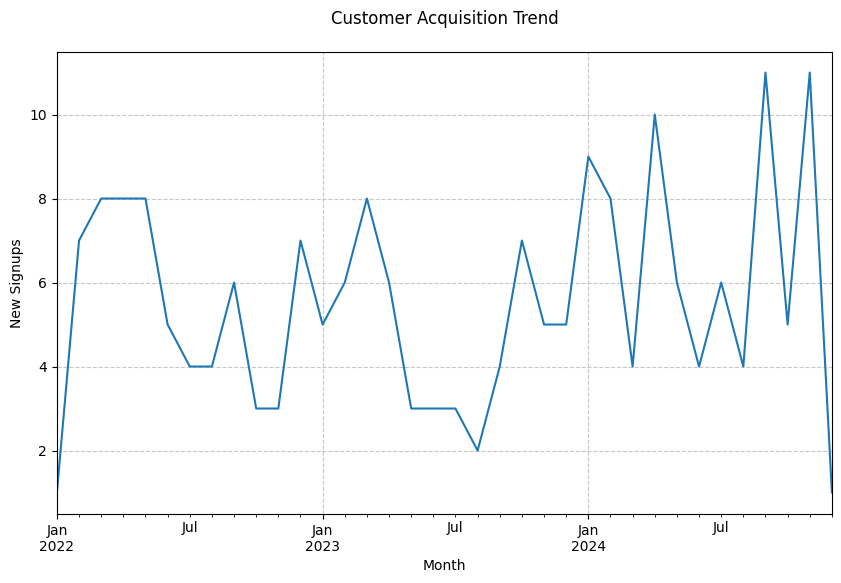

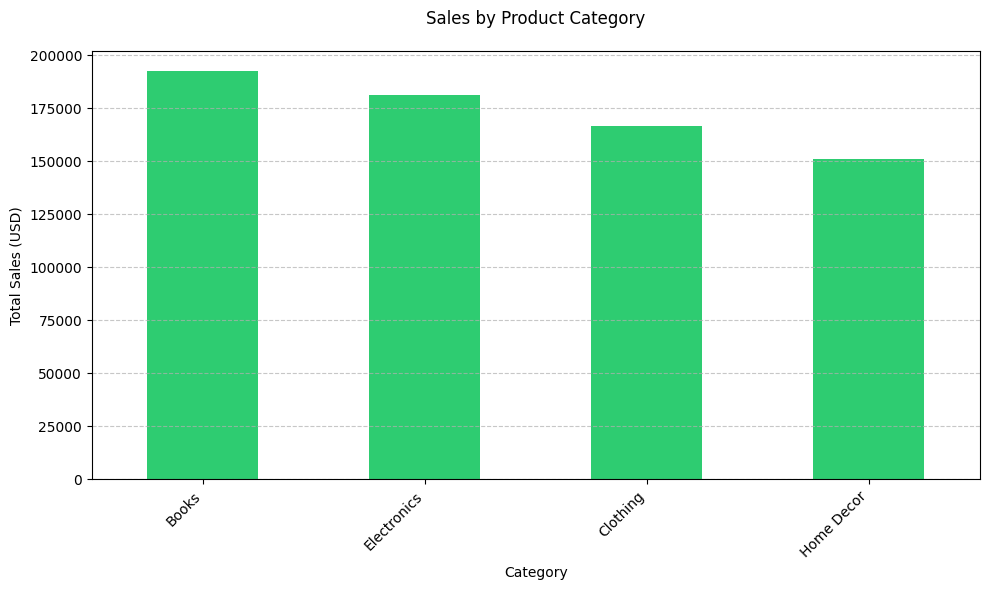

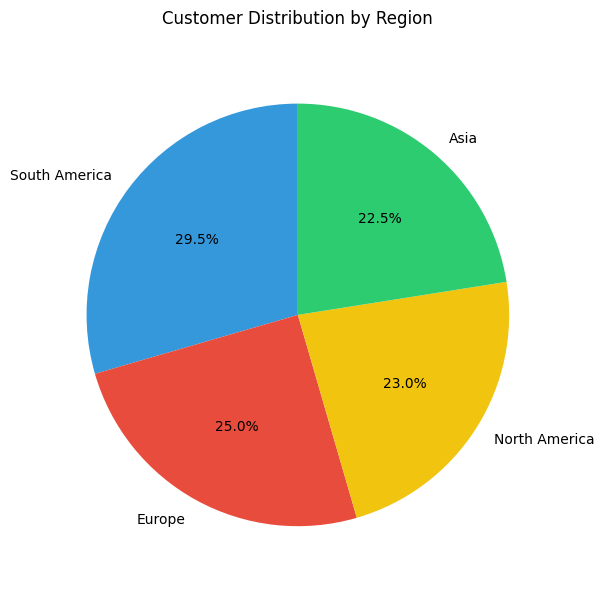

In [35]:
if __name__ == "__main__":
    (
        analysis_df, monthly_signups, region_distribution, customer_ltv,
        product_sales, category_sales, price_stats,
        daily_sales, avg_order_value, purchase_frequency
    ) = main()